# Train a Decision Tree
[Documentation](https://scikit-learn.org/stable/modules/tree.html)

In [14]:
import pandas as pd

df = pd.read_csv('data.csv')
df

,Intercept,METHUSE,STFIPS_AK,STFIPS_AL,STFIPS_AR,STFIPS_AZ,STFIPS_CA,STFIPS_CO,STFIPS_CT,STFIPS_DC,...,DIVISION_WestNorthCentral,DIVISION_WestSouthCentral,REGION_Midwest,REGION_Northeast,REGION_South,REGION_West,IDU_IDU,IDU_NoIDU,ALCDRUG_Alcohol&Drugs,ALCDRUG_OtherDrugs
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522959,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
522960,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
522961,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
522962,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')
y = df['METHUSE']
X = df.drop(columns='METHUSE')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

todo add more parameters

In [16]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(
    random_state=24,
    max_depth=6,
    max_features=4,
    max_leaf_nodes=8
                                 )

dt = dt.fit(X_train, y_train)

In [17]:
dt.predict(X_test)

array([0, 0, 1, ..., 0, 0, 1])

In [18]:
dt.predict_proba(X_test)

array([[0.73865367, 0.26134633],
       [0.84184807, 0.15815193],
       [0.25576731, 0.74423269],
       ...,
       [0.97379171, 0.02620829],
       [0.7199424 , 0.2800576 ],
       [0.25576731, 0.74423269]])

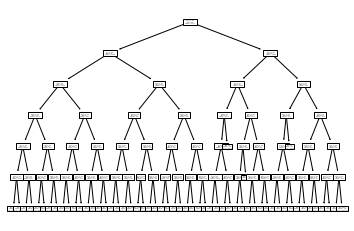

In [24]:
tree.plot_tree(dt)
tree.export_graphviz(dt, out_file='tree') # exports in tree format

In [25]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file='tree', feature_names=X.columns))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [26]:
graph = Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH